# Klassifikation mit Decision Trees

## Datensatz erzeugen

In [103]:
from sklearn import datasets

In [104]:
x, y = datasets.make_moons(500, noise=0.1)

In [105]:
import matplotlib.pyplot as plt

In [106]:
import numpy as np

def create_color(y):
    return np.where(y == 0, "#ff0000", "#0000ff")

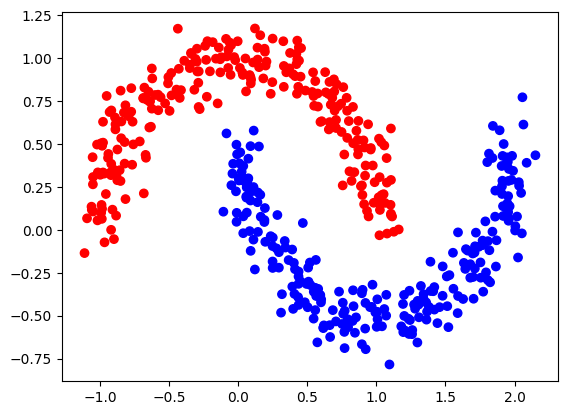

In [107]:
plt.scatter(x[:, 0], x[:,1], color=create_color(y))

### In Trainings- und Testset splitten

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

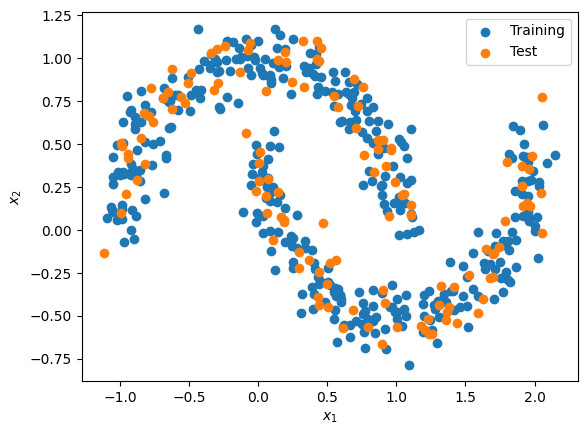

In [110]:
plt.scatter(x_train[:, 0], x_train[:, 1], label="Training")
plt.scatter(x_test[:, 0], x_test[:, 1], label="Test")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()

## Decision Tree fitten

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model = DecisionTreeClassifier()

In [113]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### Fit qualitativ untersuchen

In [114]:
y_train[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

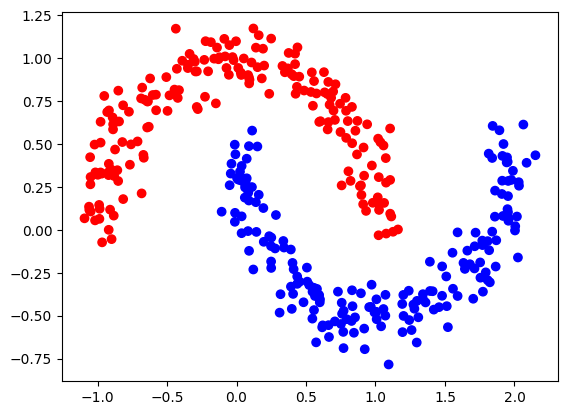

In [115]:
plt.scatter(x_train[:, 0], x_train[:, 1], color=create_color(model.predict(x_train)))

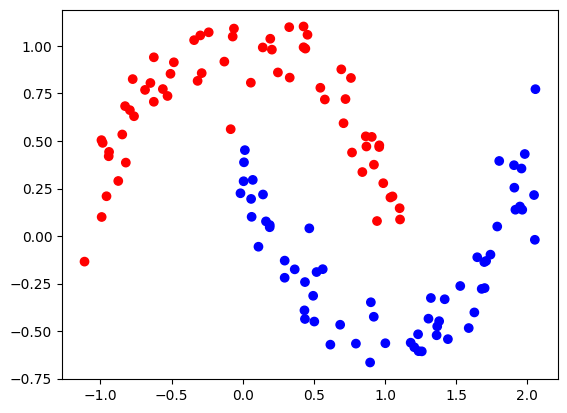

In [116]:
plt.scatter(x_test[:, 0], x_test[:, 1], color=create_color(model.predict(x_test)))

### Fit quantitativ untersuchen

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [118]:
accuracy_score(y_train, model.predict(x_train))

1.0

In [119]:
accuracy_score(y_test, model.predict(x_test))

0.992

In [120]:
recall_score(y_test, model.predict(x_test))

0.984375

In [121]:
precision_score(y_test, model.predict(x_test))

1.0

In [122]:
model.score(x_test, y_test)

0.992

### Modell untersuchen

In [123]:
from sklearn.tree import plot_tree

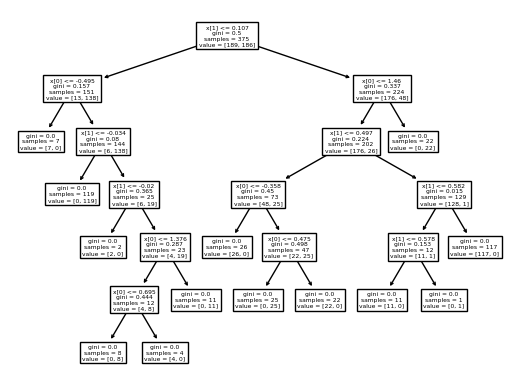

In [124]:
_ = plot_tree(model)

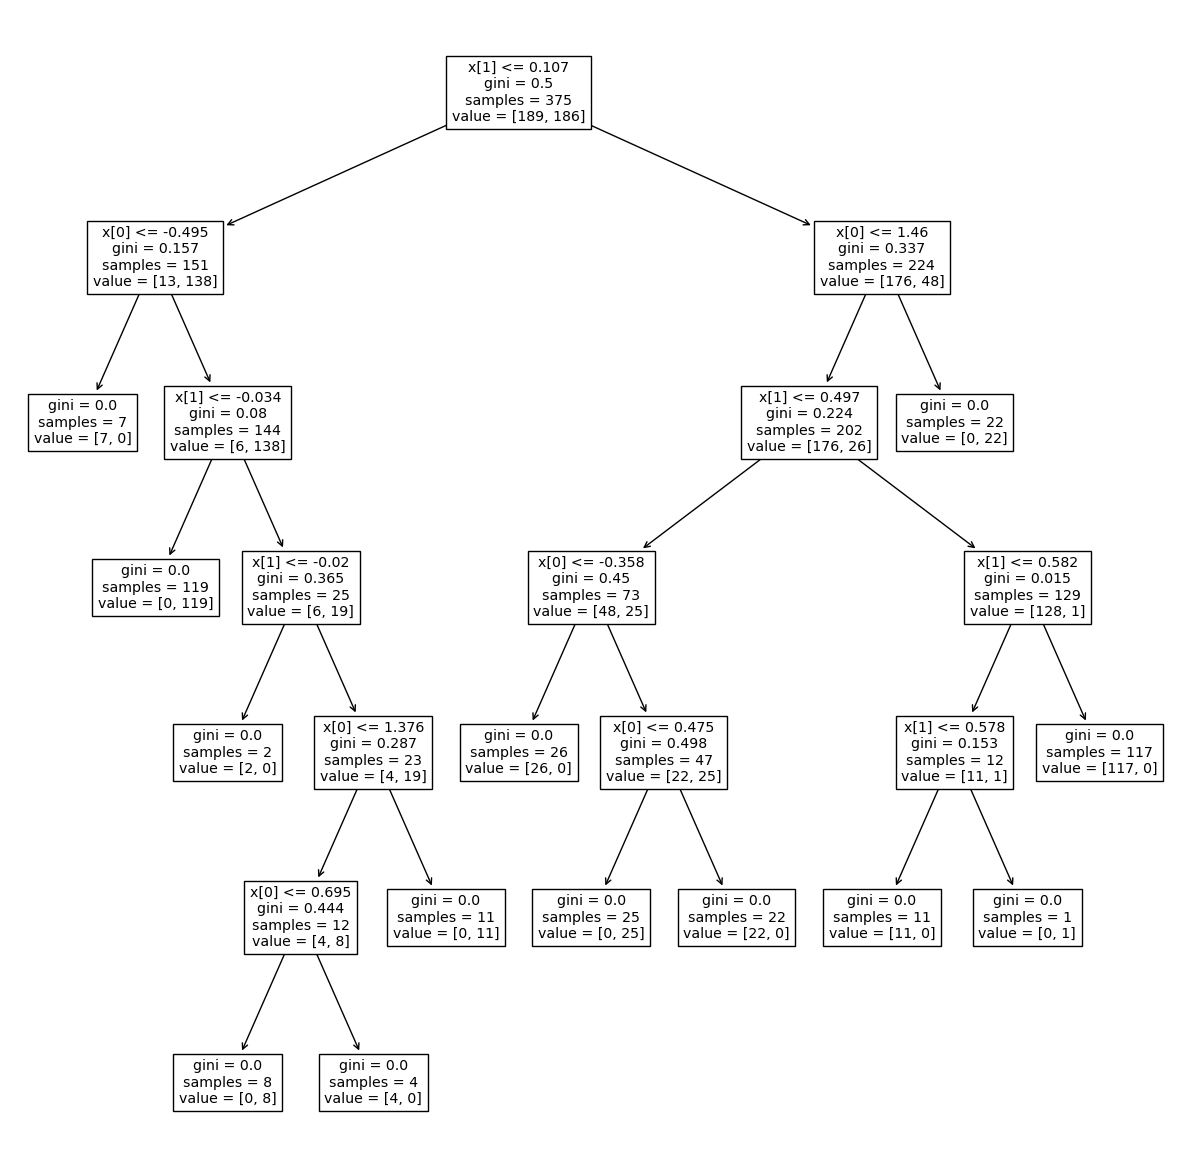

In [125]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
_ = plot_tree(model, ax=ax)

## Einfluss der Modell-Komplexität untersuchen

**Aufgabe:**

Mit dem Parameter `max_depth` kann die Tiefe des Entscheidungsbaums begrenzt werden.

1) Fitte einen Decision Tree mit `max_depth=2` und einen Decision Tree mit `max_depth=10`. Untersuche mit Hilfe eines Plots qualitativ, wie sich die Güte des Fits unterscheidet.


In [126]:
model_2 = DecisionTreeClassifier(max_depth=2)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [127]:
model_10 = DecisionTreeClassifier(max_depth=2)
model_10.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

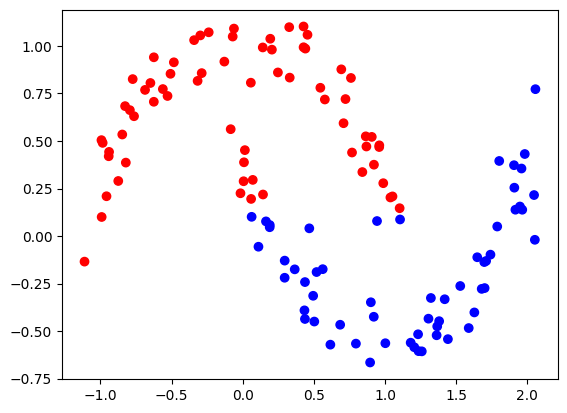

In [128]:
plt.scatter(x_test[:, 0], x_test[:, 1], color=create_color(model_2.predict(x_test)))

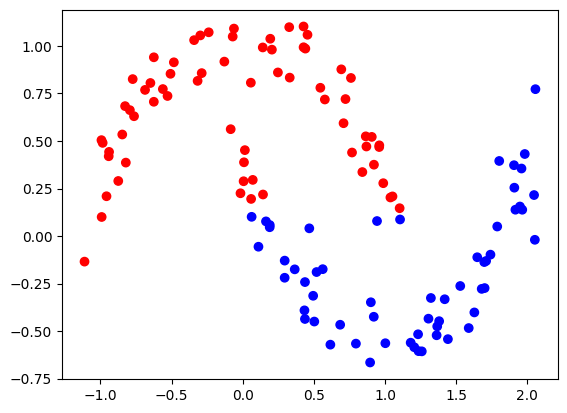

In [129]:
plt.scatter(x_test[:, 0], x_test[:, 1], color=create_color(model_10.predict(x_test)))

2) Fitte für jede mögliche Tiefe zwischen 1 und 16 einen Decision Tree (`for`-Schleife benutzen!) und errechne die Accuracy sowohl für das Test- als auch für das Trainings-Set.

3) Plotte die Accuracy für Trainings- und Testdaten über die maximale Baumtiefe

In [130]:
depths = list(range(1, 17))

training_accuracy = []
test_accuracy = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    
    training_accuracy.append(accuracy_score(y_train, model.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, model.predict(x_test)))

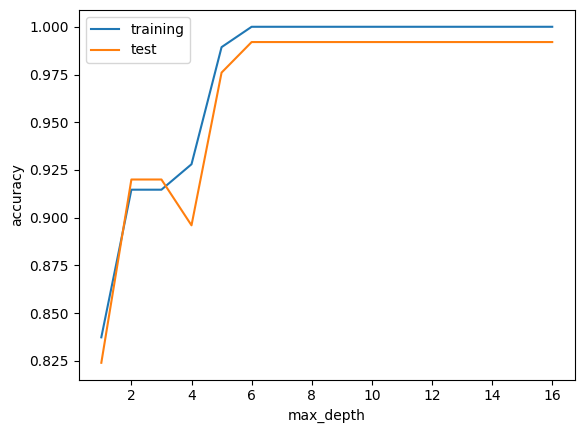

In [131]:
fig, ax = plt.subplots()

ax.plot(depths, training_accuracy, label="training")
ax.plot(depths, test_accuracy, label="test")
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.legend(loc="upper left")

4) Ermittle mit folgender Funktion die tatsächliche maximale Tiefe des Baums und füge diese dem Plot hinzu. (Ein Beispiel für einen Plot mit zwei Y-Achsen ist unten angefügt.)

In [132]:
def get_max_depth(tree):
    n_nodes = tree.tree_.node_count
    node_depth = np.zeros(shape=n_nodes, dtype=int)
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    
    stack = [(0, 0)]
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        is_split_node = children_left[node_id] != children_right[node_id]
        if is_split_node:
            stack.append((children_left[node_id], depth+1))
            stack.append((children_right[node_id], depth+1))
    
    return np.max(node_depth)

In [133]:
get_max_depth(model)

6

In [134]:
depths = list(range(1, 17))

training_accuracy = []
test_accuracy = []
actual_depth = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    
    training_accuracy.append(accuracy_score(y_train, model.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, model.predict(x_test)))
    actual_depth.append(get_max_depth(model))

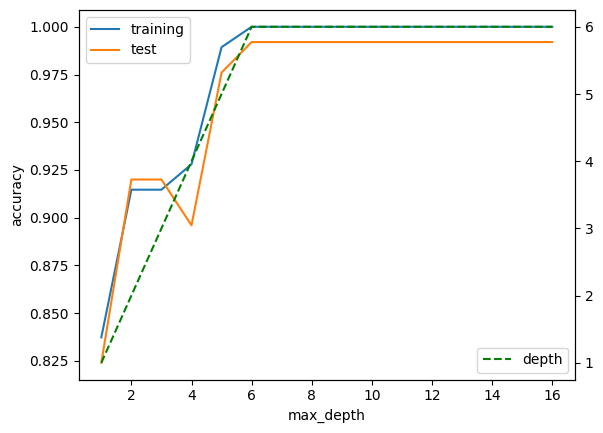

In [135]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(depths, training_accuracy, label="training")
ax.plot(depths, test_accuracy, label="test")
ax2.plot(depths, actual_depth, "g--", label="depth")
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.legend(loc="upper left")
ax2.legend(loc="lower right")

## Feature Importance

In [136]:
model.feature_importances_

array([0.43666068, 0.56333932])